In [62]:
from rich import print as rprint

import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.precision", 2)

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


In [63]:
# Load risk features
data_freq = arff.load("freMTPL2freq.arff")

df_freq = pd.DataFrame(
    data_freq,
    columns=[
        "IDpol",
        "ClaimNb",
        "Exposure",
        "Area",
        "VehPower",
        "VehAge",
        "DrivAge",
        "BonusMalus",
        "VehBrand",
        "VehGas",
        "Density",
        "Region",
    ],
)

df_freq.head()


,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
1,3.0,1.0,0.77,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
2,5.0,1.0,0.75,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22'
3,10.0,1.0,0.09,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
4,11.0,1.0,0.84,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'


In [64]:
# Load claim amounts
data_sev = arff.load("freMTPL2sev.arff")

df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])

df_sev.head()


,IDpol,ClaimAmount
0,1.55e+03,995.20
1,1.01e+06,1128.12
2,4.02e+06,1851.11
3,4.01e+06,1204.00
4,4.05e+06,1204.00


Der zweite Vertrag hat sechs Verträge mehr als der erste Vertrag.


In [65]:
df = df_freq.set_index("IDpol").join(df_sev.set_index("IDpol"))

df["ClaimAmount"] = df["ClaimAmount"].replace(to_replace=np.nan, value=0.0)


df["ClaimExp"] = df["ClaimAmount"] / df["Exposure"]


In [66]:
rprint(df_freq.info())

df_freq.describe(include=["float64", "object"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  float64
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  float64
 5   VehAge      678013 non-null  float64
 6   DrivAge     678013 non-null  float64
 7   BonusMalus  678013 non-null  float64
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  float64
 11  Region      678013 non-null  object 
dtypes: float64(8), object(4)
memory usage: 62.1+ MB


None

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
count,6.78e+05,678013.00,6.78e+05,678013,678013.00,678013.00,678013.00,678013.00,678013,678013,678013.00,678013
unique,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,11,2,NaN,22
top,NaN,NaN,NaN,'C',NaN,NaN,NaN,NaN,'B12',Regular,NaN,'R24'
freq,NaN,NaN,NaN,191880,NaN,NaN,NaN,NaN,166024,345877,NaN,160601
mean,2.62e+06,0.05,5.29e-01,NaN,6.45,7.04,45.50,59.76,NaN,NaN,1792.42,NaN
std,1.64e+06,0.24,3.64e-01,NaN,2.05,5.67,14.14,15.64,NaN,NaN,3958.65,NaN
min,1.00e+00,0.00,2.73e-03,NaN,4.00,0.00,18.00,50.00,NaN,NaN,1.00,NaN
25%,1.16e+06,0.00,1.80e-01,NaN,5.00,2.00,34.00,50.00,NaN,NaN,92.00,NaN
50%,2.27e+06,0.00,4.90e-01,NaN,6.00,6.00,44.00,50.00,NaN,NaN,393.00,NaN
75%,4.05e+06,0.00,9.90e-01,NaN,7.00,11.00,55.00,64.00,NaN,NaN,1658.00,NaN


In [67]:
rprint(df_sev.info())

df_sev.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  float64
 1   ClaimAmount  26639 non-null  float64
dtypes: float64(2)
memory usage: 416.4 KB


None

,IDpol,ClaimAmount
count,2.66e+04,2.66e+04
mean,2.28e+06,2.28e+03
std,1.58e+06,2.93e+04
min,1.39e+02,1.00e+00
25%,1.09e+06,6.87e+02
50%,2.14e+06,1.17e+03
75%,3.18e+06,1.23e+03
max,6.11e+06,4.08e+06


<Axes: xlabel='IDpol', ylabel='ClaimNb'>

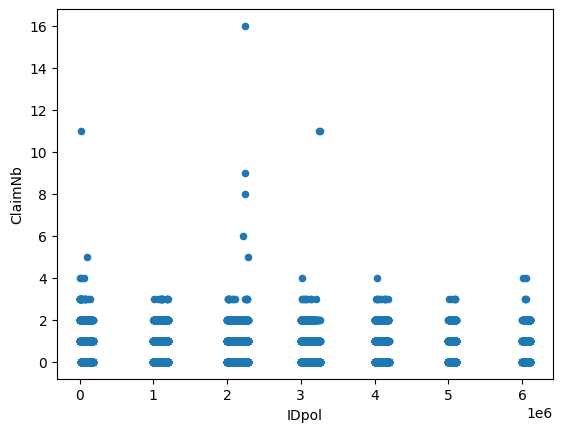

In [68]:
df_freq.plot.scatter(x="IDpol", y="ClaimNb")


<Axes: xlabel='IDpol', ylabel='Exposure'>

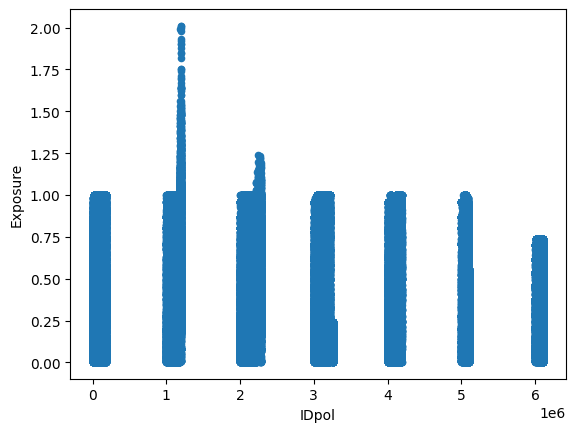

In [69]:
df_freq.plot.scatter(x="IDpol", y="Exposure")


<Axes: xlabel='IDpol', ylabel='Area'>

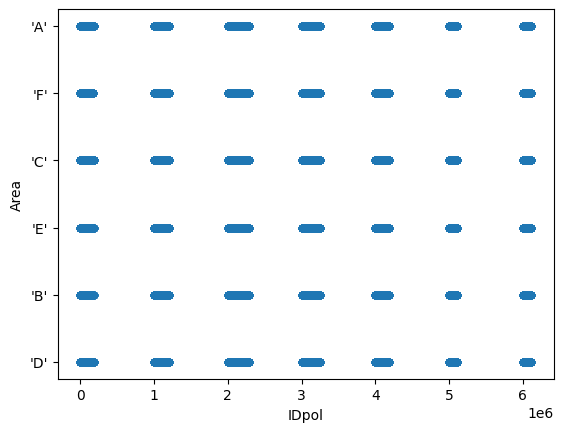

In [70]:
df_freq.plot.scatter(x="IDpol", y="Area")


<Axes: xlabel='IDpol', ylabel='VehPower'>

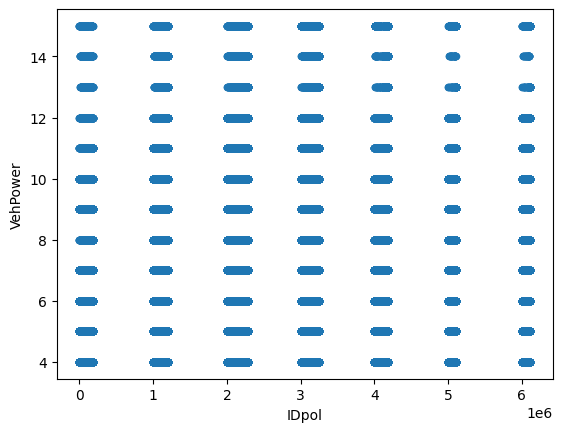

In [71]:
df_freq.plot.scatter(x="IDpol", y="VehPower")


<Axes: xlabel='IDpol', ylabel='DrivAge'>

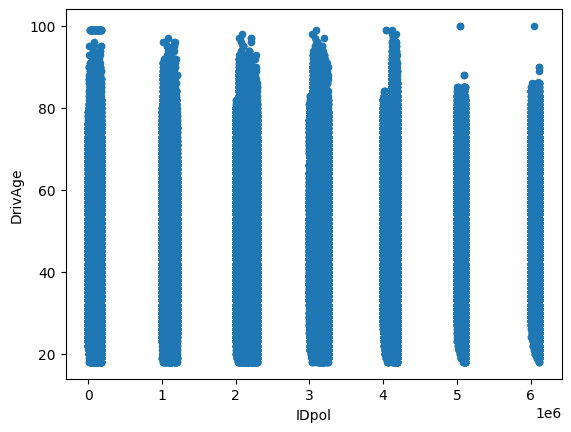

In [72]:
df_freq.plot.scatter(x="IDpol", y="DrivAge")


<Axes: >

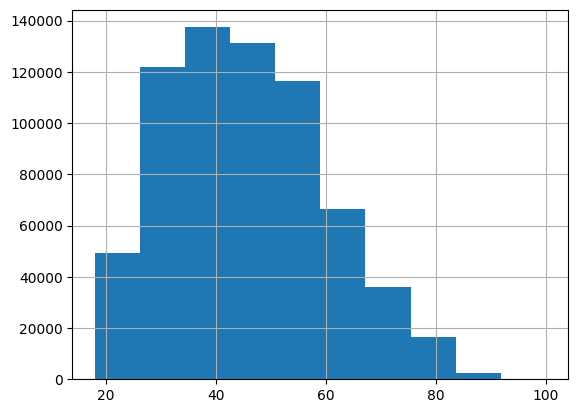

In [73]:
df_freq["DrivAge"].hist()


<Axes: xlabel='IDpol', ylabel='BonusMalus'>

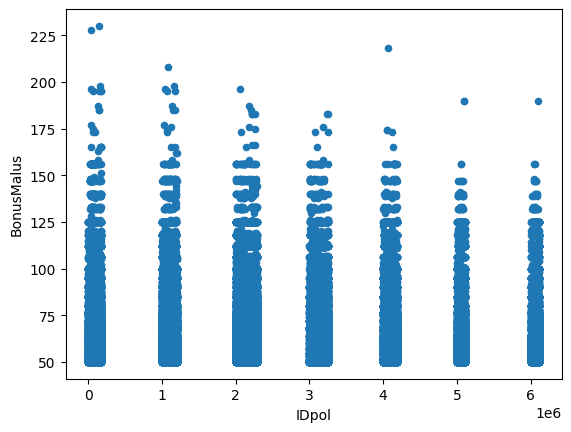

In [74]:
df_freq.plot.scatter(x="IDpol", y="BonusMalus")


<Axes: xlabel='IDpol', ylabel='VehBrand'>

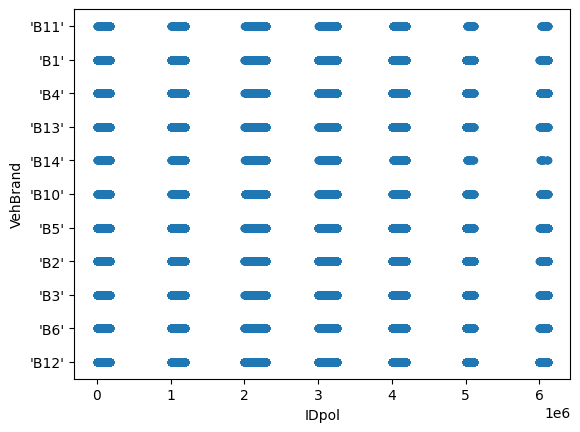

In [75]:
df_freq.plot.scatter(x="IDpol", y="VehBrand")


<Axes: xlabel='IDpol', ylabel='VehGas'>

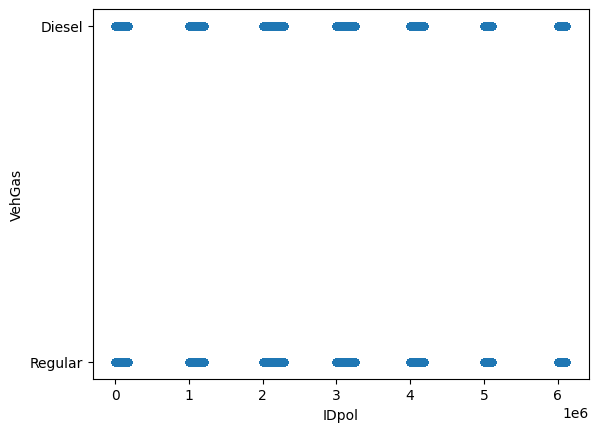

In [76]:
df_freq.plot.scatter(x="IDpol", y="VehGas")


<Axes: >

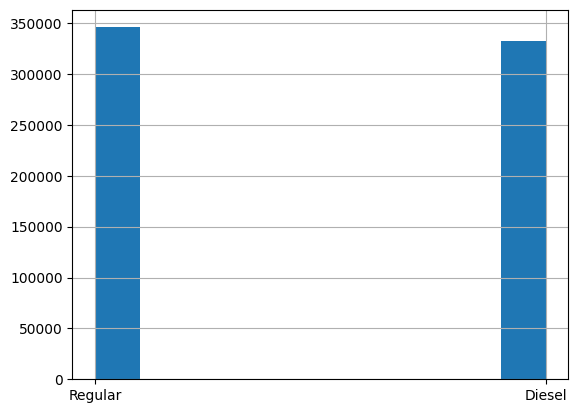

In [77]:
df_freq["VehGas"].hist()


<Axes: xlabel='IDpol', ylabel='Density'>

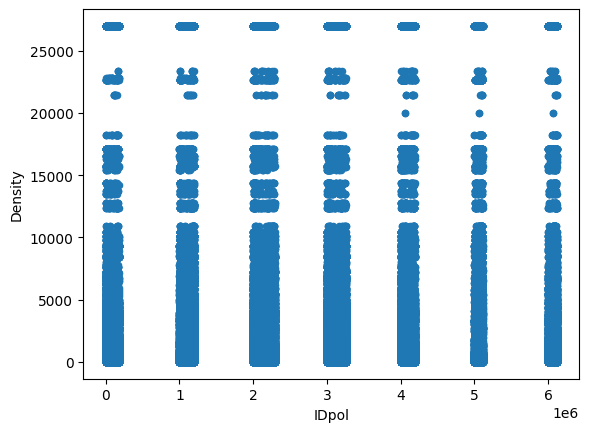

In [78]:
df_freq.plot.scatter(x="IDpol", y="Density")


<Axes: xlabel='IDpol', ylabel='Region'>

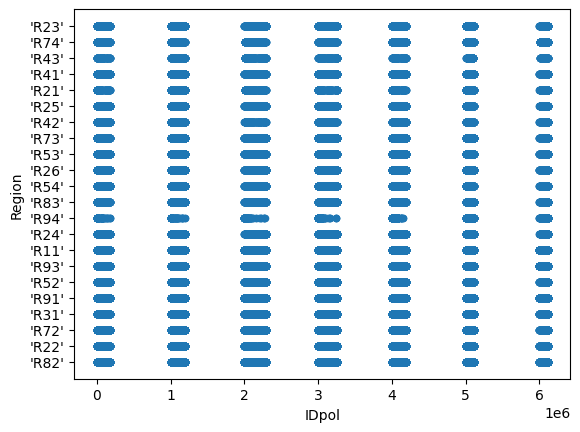

In [79]:
df_freq.plot.scatter(x="IDpol", y="Region")


<Axes: xlabel='IDpol', ylabel='ClaimAmount'>

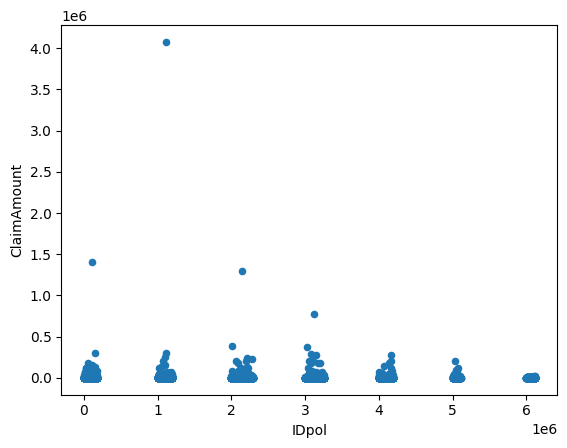

In [80]:
df_sev.plot.scatter(x="IDpol", y="ClaimAmount")


<Axes: xlabel='IDpol', ylabel='ClaimAmount'>

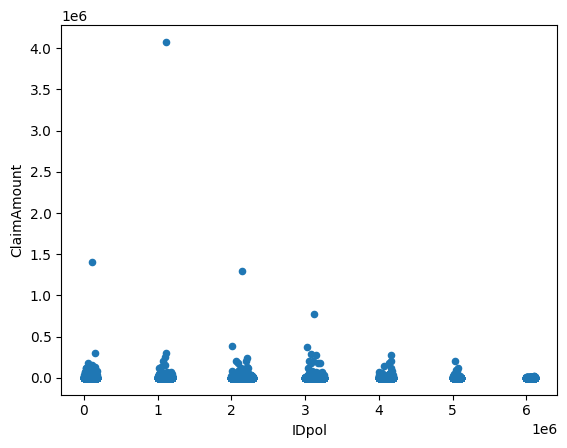

In [81]:
df["IDpol"] = df.index
df.plot.scatter(x="IDpol", y="ClaimAmount")


In [82]:
pd.crosstab(df_freq["Area"], df_freq["Region"], margins=True)


Region,'R11','R21','R22','R23','R24','R25','R26','R31','R41','R42',...,'R54','R72','R73','R74','R82','R83','R91','R93','R94',All
Area,,,,,,,,,,,,,,,,,,,,,
'A',1197,991,1116,971,55292,1990,3396,621,794,21,...,4302,5364,3293,2011,5305,1655,2770,3754,1432,103957
'B',1891,445,1557,1175,25664,1821,1329,1415,854,185,...,3433,3424,2146,446,6383,747,3567,5069,423,75459
'C',6507,594,1790,2273,46096,3323,3573,6579,3802,649,...,5224,9203,4759,1407,23812,1305,17453,20635,1006,191880
'D',12253,549,1729,1242,24169,2026,770,11626,6755,480,...,5471,5902,3026,703,23012,674,9552,22619,1655,151596
'E',29989,447,1802,3123,9380,1733,1424,7044,785,865,...,616,7436,3917,0,26240,906,2463,27238,0,137167
'F',17954,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17954
All,69791,3026,7994,8784,160601,10893,10492,27285,12990,2200,...,19046,31329,17141,4567,84752,5287,35805,79315,4516,678013


<Axes: xlabel='IDpol', ylabel='ClaimExp'>

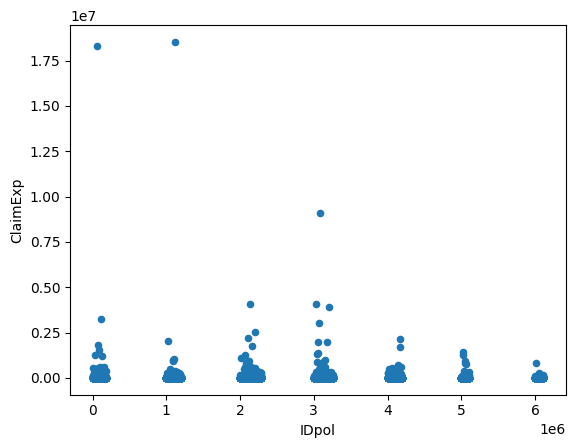

In [83]:
df.plot.scatter(x="IDpol", y="ClaimExp")
